## **Step 1: Reading and preparing the data**

In [54]:
import os
import re
import nltk
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

Keeping only the alphabets and storing the data in a list as tuples for both spam and ham separately

In [2]:
data = []

for filename in os.listdir('ham/'):
    with open(os.path.join('ham/', filename), 'rb') as f:
        s = f.read().decode("utf-8")
        news = re.sub(r'[^A-Za-z ]+', '', s)
        news = news.lower()
        data.append((news,"ham"))
        
print(len(data))

3672


In [3]:
for filename in os.listdir('spam/'):
    with open(os.path.join('spam/', filename), 'rb') as f:
        s = f.read().decode("latin1")
        news = re.sub(r'[^A-Za-z ]+', '', s)
        news = news.lower()
        data.append((news,"spam"))
    
print(len(data))

5172


Saving this preprocessed data in CSV format for easy access

In [4]:
df = pd.DataFrame(data, columns =['Email', 'Label']) 
df.to_csv('email.csv', index=False)

In [5]:
data = pd.read_csv("email.csv")
data.head()

,Email,Label
0,subject re natural gas nomination for i wen...,ham
1,subject hpl nom for february see attached f...,ham
2,subject re error repairsjay for june i need ...,ham
3,subject enron hpl actuals for october teco ...,ham
4,subject jan feb midcon invoicespat dresner a...,ham


ham     3672
spam    1500
Name: Label, dtype: int64


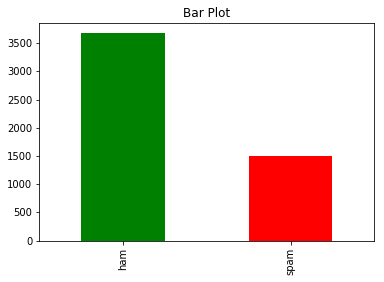

In [46]:
X = data.iloc[:,0]
Y = data.iloc[:,1]

counts = data['Label'].value_counts()
print(counts)
counts.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

## **Step 2: Finding the unique words found in the email dataset**

In [7]:
def rem_stopwords(line):
    return [word for word in line.split() if word.lower() not in stopwords.words('english')]

In [8]:
print(X.apply(rem_stopwords))

0       [subject, natural, gas, nomination, went, ahea...
1       [subject, hpl, nom, february, see, attached, f...
2       [subject, error, repairsjay, june, need, coupl...
3       [subject, enron, hpl, actuals, october, teco, ...
4       [subject, jan, feb, midcon, invoicespat, dresn...
5       [subject, revised, th, noms, forwarded, ami, c...
6       [subject, channel, dispatch, fyi, forwarded, g...
7       [subject, panenergy, marketing, exchange, deal...
8       [subject, shell, houston, openfirst, come, fir...
9       [subject, noms, actual, flow, thru, agree, nom...
10      [subject, th, noms, forwarded, ami, chokshi, c...
11      [subject, enron, actuals, december, teco, tap,...
12      [subject, meter, daren, flow, month, april, de...
13      [subject, mtbe, upsetsthe, mtbe, plant, determ...
14      [subject, meter, may, need, assistance, issue,...
15      [subject, meeting, thoughtsi, sitting, bit, di...
16      [subject, wc, revision, effective, stingray, p...
17      [subje

Transform words to numbers to find the unique words

In [50]:
num_words = CountVectorizer(analyzer = rem_stopwords).fit(X)
num_words.vocabulary_

{'subject': 54196,
 'natural': 38476,
 'gas': 23766,
 'nomination': 39365,
 'went': 62241,
 'ahead': 1421,
 'accepted': 300,
 'nom': 39325,
 'put': 46218,
 'start': 53467,
 'monthpricing': 37563,
 'base': 5709,
 'ticket': 57450,
 'ignored': 28202,
 'limit': 33646,
 'goodprice': 24775,
 'daren': 14940,
 'j': 30610,
 'farmer': 21266,
 'pmto': 44290,
 'lee': 33226,
 'l': 32637,
 'papayoti': 42328,
 'hou': 27298,
 'ect': 18567,
 'ectcc': 18570,
 'sitara': 51953,
 'max': 35709,
 'flex': 22197,
 'correct': 13643,
 'shouldthe': 51610,
 'additional': 758,
 'swing': 54806,
 'included': 28710,
 'index': 28882,
 'forwarded': 22859,
 'pm': 44242,
 'michael': 36631,
 'mitcham': 37099,
 'enron': 19605,
 'david': 15103,
 'bush': 8747,
 'ecf': 18514,
 'mark': 35379,
 'diedrich': 16585,
 'gpgfin': 24894,
 'paulfox': 42701,
 'johnson': 31270,
 'robertlee': 49122,
 'thomas': 57237,
 'meers': 36115,
 'marittamullet': 35373,
 'james': 30686,
 'prentice': 44978,
 'kerryroper': 31965,
 'sally': 49840,
 'shul

In [52]:
len(num_words.vocabulary_)

65032

## **Step 3: Find the frequency of occurance of words**

In [10]:
freq_word = num_words.transform(X)
print(freq_word)

  (0, 300)	1
  (0, 758)	1
  (0, 1421)	2
  (0, 4692)	1
  (0, 5709)	1
  (0, 7469)	1
  (0, 8747)	1
  (0, 13643)	1
  (0, 14940)	3
  (0, 15103)	2
  (0, 15146)	1
  (0, 15157)	1
  (0, 16585)	1
  (0, 18514)	4
  (0, 18567)	13
  (0, 18570)	2
  (0, 19085)	1
  (0, 19605)	22
  (0, 21266)	2
  (0, 22197)	1
  (0, 22436)	2
  (0, 22859)	1
  (0, 23024)	1
  (0, 23766)	5
  (0, 24775)	1
  :	:
  (5171, 38888)	1
  (5171, 39011)	1
  (5171, 39810)	1
  (5171, 40922)	2
  (5171, 42877)	1
  (5171, 43356)	1
  (5171, 43436)	1
  (5171, 45007)	1
  (5171, 45477)	1
  (5171, 47002)	1
  (5171, 47299)	1
  (5171, 49647)	2
  (5171, 51457)	1
  (5171, 51537)	1
  (5171, 52605)	1
  (5171, 52963)	1
  (5171, 53861)	1
  (5171, 54196)	1
  (5171, 60518)	1
  (5171, 61223)	1
  (5171, 62918)	1
  (5171, 63599)	2
  (5171, 63805)	1
  (5171, 63940)	1
  (5171, 64887)	1


We are finding out in each email which word is more important or the most significant

In [11]:
tfidf_transformer = TfidfTransformer().fit(freq_word)
email_tfidf = tfidf_transformer.transform(freq_word)
print(email_tfidf)

  (0, 62241)	0.05040598209212112
  (0, 57450)	0.11001166595911799
  (0, 57237)	0.04938835592828937
  (0, 56533)	0.06403050328855155
  (0, 54806)	0.047237432598002047
  (0, 54196)	0.02859357854565269
  (0, 53685)	0.0634857154233257
  (0, 53467)	0.04353469025902173
  (0, 51953)	0.034218914588648064
  (0, 51672)	0.0724875611552405
  (0, 51610)	0.08442788660149295
  (0, 49840)	0.05496656487547695
  (0, 49122)	0.07569454293066054
  (0, 48242)	0.10163492877571842
  (0, 46218)	0.0416995247377028
  (0, 44978)	0.0724875611552405
  (0, 44357)	0.04067917245505417
  (0, 44290)	0.05431345868024831
  (0, 44242)	0.029859732075054067
  (0, 43976)	0.07807737690118617
  (0, 43040)	0.07051187125668165
  (0, 42701)	0.07569454293066054
  (0, 42328)	0.10711883539893585
  (0, 39761)	0.06817960377616929
  (0, 39365)	0.10789946264197758
  :	:
  (5171, 40922)	0.16421666042184882
  (5171, 39810)	0.17701574548832685
  (5171, 39011)	0.17701574548832685
  (5171, 38888)	0.059726196281358813
  (5171, 37680)	0.1689131

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(email_tfidf, Y, test_size=0.20, random_state=50)

## **Step 4: Trying out different Classifiers**

## **Naive Bayes**

**Multinomial Naive Bayes**

In [19]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
Y_predict = MultiNB.predict(X_test)

print("The accuracy is: ",accuracy_score(Y_test, Y_predict)*100,"%")

The accuracy is:  89.17874396135265 %


In [33]:
print(confusion_matrix(Y_test, Y_predict))

[[743   0]
 [112 180]]


**Gaussian Naive Bayes**

In [37]:
GausNB = GaussianNB()
GausNB.fit(X_train.toarray(),Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
Y_predict = GausNB.predict(X_test.toarray())

print("The accuracy is: ",accuracy_score(Y_test, Y_predict)*100,"%")

The accuracy is:  96.03864734299516 %


In [39]:
print(confusion_matrix(Y_test, Y_predict))

[[730  13]
 [ 28 264]]


**Bernoulli Naive Bayes**

In [34]:
BernNB = BernoulliNB(binarize = 0.05)
BernNB.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.05, class_prior=None, fit_prior=True)

In [35]:
Y_predict = BernNB.predict(X_test)

print("The accuracy is: ",accuracy_score(Y_test, Y_predict)*100,"%")

The accuracy is:  86.76328502415458 %


In [36]:
print(confusion_matrix(Y_test, Y_predict))

[[734   9]
 [128 164]]


## **Support Vector Machine (SVM)**

**Linear Support Vector Machine**

In [40]:
SVML = LinearSVC()
SVML.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
Y_predict = SVML.predict(X_test)

print("The accuracy is: ",accuracy_score(Y_test, Y_predict)*100,"%")

The accuracy is:  98.16425120772946 %


In [42]:
print(confusion_matrix(Y_test, Y_predict))

[[728  15]
 [  4 288]]


**Quadratic Support Vector Machine**

In [43]:
SVMQ = SVC(kernel='poly', degree=2, gamma='scale')
SVMQ.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
Y_predict = SVMQ.predict(X_test)

print("The accuracy is: ",accuracy_score(Y_test, Y_predict)*100,"%")

The accuracy is:  99.03381642512076 %


In [45]:
print(confusion_matrix(Y_test, Y_predict))

[[740   3]
 [  7 285]]
